# Vibes of a neighbourhood

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

calendar_df = pd.read_csv('C:/Users/prati/OneDrive/Desktop/calendar.csv')
listing_df = pd.read_csv('C:/Users/prati/OneDrive/Desktop/listings.csv')
reviews_df = pd.read_csv('C:/Users/prati/OneDrive/Desktop/reviews.csv')

Vibe of a neighbourhood can be thought in terms of pricing and  availability. 

In [2]:
# first clean data, remove $ sign from price
listing_df['price']= listing_df['price'].replace({'\$':'', ',': ''}, regex = True).astype(float)
listing_df
vibe = listing_df[['host_id','host_name','property_type','neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed','price','minimum_nights','availability_30','availability_60','availability_90','availability_365']]
vibe_price_hood = vibe.groupby(['neighbourhood','property_type']).mean()['price'].reset_index(name='avg_price')

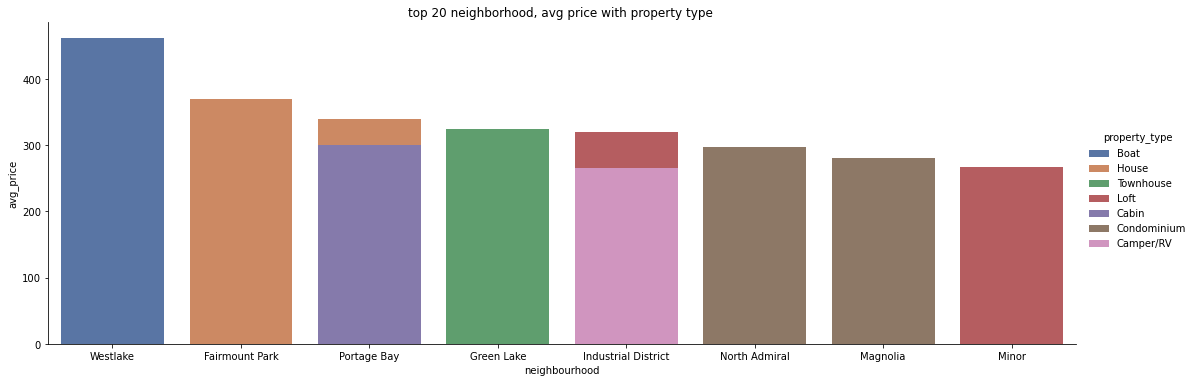

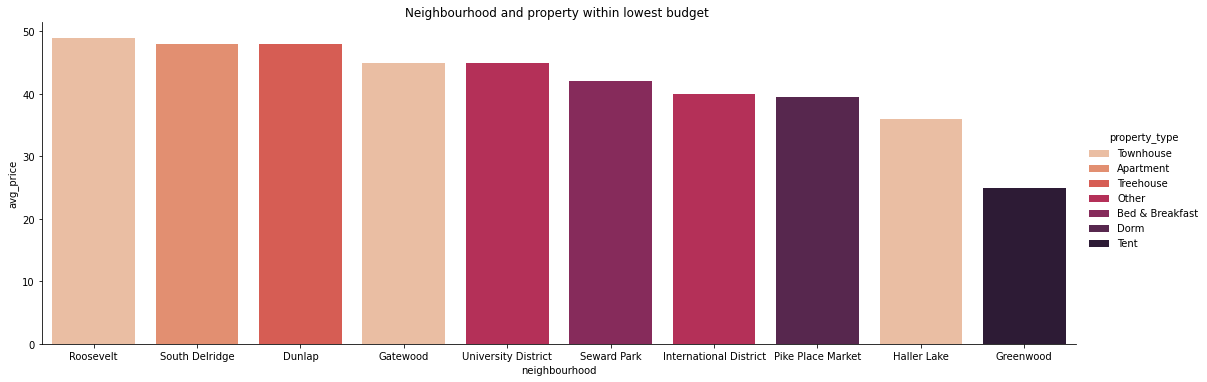

In [26]:
# sort by avg price

high_vibe=vibe_price_hood.sort_values(by= 'avg_price', ascending = False)
high_vibe1=high_vibe.head(10)
low_vibe = high_vibe.tail(10)
x_high = high_vibe1['avg_price']
y_high = high_vibe1['neighbourhood']
hue_high = high_vibe1['property_type']
x_low = low_vibe['avg_price']
y_low = low_vibe['neighbourhood']
hue_low = low_vibe['property_type']
ax_1 = sns.catplot(data=high_vibe1, x= 'neighbourhood', y= 'avg_price', hue = 'property_type',kind='bar', palette='deep',dodge=False, aspect=3 )

plt.title('top 20 neighborhood, avg price with property type ')
plt.show()
ax_2 = sns.catplot(data=low_vibe, x= 'neighbourhood', y= 'avg_price', hue = 'property_type',kind='bar', palette='rocket_r',dodge=False, aspect=3  )

plt.title('Neighbourhood and property within lowest budget ')
plt.show()

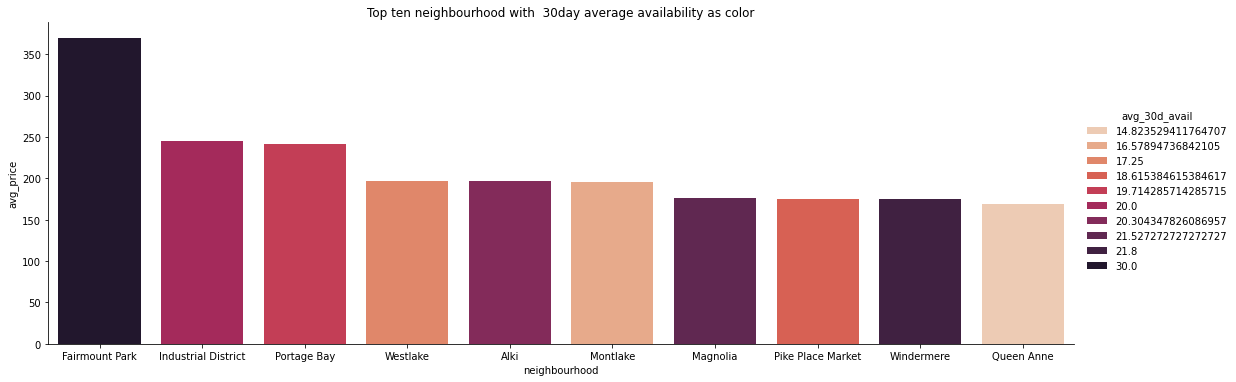

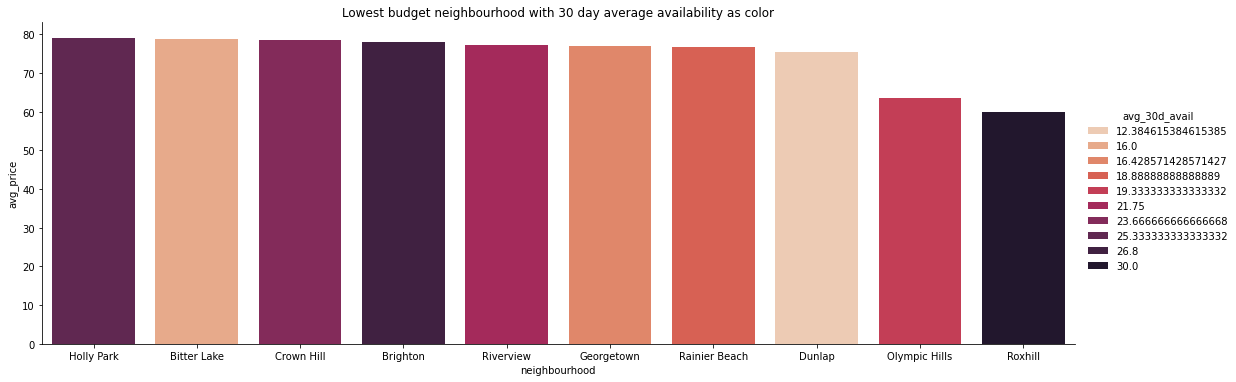

In [27]:
# top and bottom neighbourhood availability

avail_30 = vibe.groupby(['neighbourhood']).mean()['availability_30'].reset_index(name='avg_30d_avail')
price_hood = vibe.groupby(['neighbourhood']).mean()['price'].reset_index(name='avg_price')
col_avg_price = price_hood['avg_price']
avg_price_avail_hood_merge_df = pd.concat([avail_30, col_avg_price], axis = 1, sort = False)

sort_hood_price_avail30d = avg_price_avail_hood_merge_df.sort_values(by = 'avg_price', ascending = False)

high_vibe2 = sort_hood_price_avail30d.head(10)
x_high2 = high_vibe2['avg_price']
y_high2 = high_vibe2['neighbourhood']
hue_high2 = high_vibe2['avg_30d_avail']
ax=sns.catplot(data=high_vibe2, x= 'neighbourhood', y= 'avg_price', hue = 'avg_30d_avail' , kind ='bar',palette='rocket_r', dodge=False, aspect=3)

plt.title('Top ten neighbourhood with  30day average availability as color')
plt.show()

low_vibe2 = sort_hood_price_avail30d.tail(10)
x_low2 = low_vibe2['avg_price']
y_low2 = low_vibe2['neighbourhood']
hue_low2 = low_vibe2['avg_30d_avail']
ax2=sns.catplot(data=low_vibe2, x= 'neighbourhood', y= 'avg_price', hue = 'avg_30d_avail' , kind ='bar',palette='rocket_r', dodge=False, aspect=3)

plt.title('Lowest budget neighbourhood with 30 day average availability as color')
plt.show()
